In [29]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [1]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)# x here is just a vector to be standardized (subtract mean and divide by std dev)
y, tx = build_model_data(x, weight) # tx here is a matrix of x and 1s (for intercept) where x here represents the feature matrix (DxN)

In [3]:
y.shape, tx.shape

[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]


### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function

## 1.1. Define the Cost Function

\begin{equation}
    MSE=\frac{1}{2N} \sum_{n=1}^{N} \underbrace{[y_n-x_n^Tw]^2}_{L_n(w) = e_n^2}
\end{equation}

\begin{equation}
    MAE=\frac{1}{N} \sum_{n=1}^{N} |y_n-x_n^Tw|
\end{equation}


In [42]:


def compute_loss(y, tx, w,method='mse'):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    e = y - tx.dot(w)
    if method == 'mse':
        return 1/2*np.mean(e**2)
    elif method == 'mae':
        return np.mean(abs(e))
        
    # ***************************************************

#compute_loss(weight,tx,np.array([1,2]),method='mae')
compute_loss(weight,tx,np.array([1,2]),method='mse')


2694.4833658870843

# 2. Grid Search

Fill in the function `grid_search()` below:

In [43]:
# from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            losses[i,j] = compute_loss(y,tx,np.array([w0,w1]),method='mse')


    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=17.365057211881126, w0*=74.74747474747477, w1*=12.121212121212125, execution time=0.690 seconds


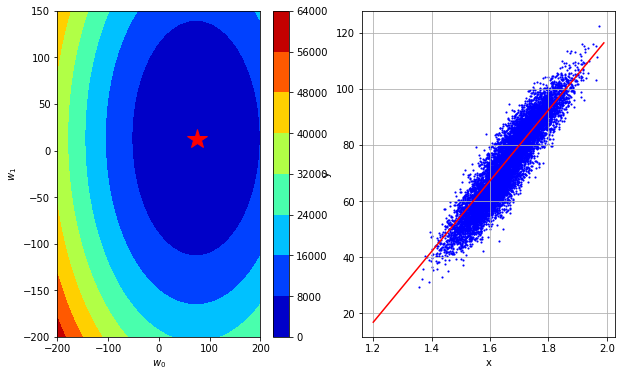

In [44]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)#Num of intervals at 10 results in bad results

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [45]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************

    # ***************************************************
    return -tx.T.dot(y-tx.dot(w))/len(y)

#compute_gradient(weight,tx,np.array([50,10]))
compute_gradient(weight,tx,np.array([100,20]))

array([26.706078  ,  6.52028757])

Please fill in the functions `gradient_descent` below:

In [47]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):#This is the gradient using the >>MSE<< loss function
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        gradient = compute_gradient(y,tx,w)
        loss = compute_loss(y,tx,w,method='mse')
        
        w = w - gamma*gradient  
        # ***************************************************
        # store w and loss    
        ws.append(w)
        losses.append(loss)
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws



Test your gradient descent function through gradient descent demo shown below:

In [40]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=73.29392200210518, w0=51.305745401473644, w1=9.435798704492269
GD iter. 1/49: loss=21.988886592353907, w0=66.69746902191571, w1=12.266538315840005
GD iter. 2/49: loss=7.265302114604107, w0=71.31498610804834, w1=13.115760199244333
GD iter. 3/49: loss=4.699945676696628, w0=72.70024123388814, w1=13.370526764265632
GD iter. 4/49: loss=4.447409765322356, w0=73.11581777164007, w1=13.446956733772023
GD iter. 5/49: loss=4.426368339890847, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=4.424908541814049, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/49: loss=4.42494113435403, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=4.424986760372248, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=4.425002951094766, w0=73.29348920882515, w1=13.47963283863509
GD iter. 10/49: loss=4.42500808460945, w0=73.29379216412117, w1=13.479688556082861
GD iter. 11/49: loss=4.425009648774414, w0=73.29388305070998, w1=13.479705271317192
GD it

In [41]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [12]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    stochastic_gradient = tx.T.dot(tx.dot(w) - y) * 1 / len(y) #So far exactly as standard gradient.
    # ***************************************************
    return stochastic_gradient

def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
        # Perform operations or computations on minibatch_y and minibatch_tx
            w = w - gamma * compute_stoch_gradient(minibatch_y,minibatch_tx,w)
            loss = compute_loss(minibatch_y,minibatch_tx,w,method='mse')
        # ***************************************************

        # store w and loss    
        ws.append(w)
        losses.append(loss)
        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [14]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=1467.9891465026938, w0=6.069692838753188, w1=-1.638977261551186
SGD iter. 1/49: loss=1944.3635954147496, w0=12.998607069465763, w1=-1.5762365094563813
SGD iter. 2/49: loss=1669.1013682351381, w0=19.540973951436406, w1=1.1114314459820913
SGD iter. 3/49: loss=712.0267789036076, w0=27.095603950575157, w1=16.229817646736542
SGD iter. 4/49: loss=478.1737224073174, w0=31.676446258539784, w1=9.359948380399786
SGD iter. 5/49: loss=341.62692604381556, w0=35.16532327793744, w1=5.075771279237409
SGD iter. 6/49: loss=489.64517060602606, w0=38.642393545922886, w1=5.06799554265962
SGD iter. 7/49: loss=792.9899841099526, w0=43.256005159980816, w1=7.867024096101708
SGD iter. 8/49: loss=518.7147258554764, w0=47.04842115769055, w1=10.567259235319089
SGD iter. 9/49: loss=265.9361542867602, w0=49.62105411526534, w1=10.08250835737919
SGD iter. 10/49: loss=419.679234633569, w0=52.8918597560524, w1=11.316517540318419
SGD iter. 11/49: loss=41.24955669957683, w0=55.33425131490527, w1=16.92

In [15]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [50]:
import datetime
from helpers import *

# Load data bs sub-sampling and outliers
height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [51]:
y.shape, tx.shape

((202,), (202, 2))

In [52]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points 
#       and the model fit
ws = [w_initial]
w = w_initial
losses = []
for n_iter in range(max_iters):
    gradient = compute_gradient(y,tx,w)
    loss = compute_loss(y,tx,w,method='mse')
    w = w - gamma*gradient  
    ws.append(w)
    losses.append(loss)
    print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
          bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
# ***************************************************


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358524, w0=51.84746409844842, w1=7.7244264061924195
GD iter. 1/49: loss=318.2821247015965, w0=67.40170332798297, w1=10.041754328050114
GD iter. 2/49: loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574597
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
GD iter. 6/49: loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481914
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
GD iter. 8/49: loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038408
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003895
GD iter. 11/49: loss=65.93073011140233, w0=74.06776649225755, w1=11.034889001593541
GD it

In [53]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [66]:
def compute_subgradient_mae(y, tx, w): #Notice that earlier we only changed the loss compuation but the gradient was always using the MSE loss function
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    e = y - tx.dot(w)
    e[np.where(e>0)] = 1
    e[np.where(e<0)] = -1
    e[np.where(e==0)] = 0.3 # or any other value between -1 and 1
    return -tx.T.dot(e)/len(y)
    # ***************************************************

In [67]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        sub_gradient = compute_subgradient_mae(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        loss = compute_loss(y,tx,w,method='mae')
        w = w - gamma*sub_gradient
        
        ws.append(w)
        losses.append(loss)
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [77]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492638, w0=0.7, w1=6.109524327590712e-16
SubGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=1.2219048655181425e-15
SubGD iter. 2/499: loss=72.66780585492637, w0=2.0999999999999996, w1=1.832857298277214e-15
SubGD iter. 3/499: loss=71.96780585492638, w0=2.8, w1=2.443809731036285e-15
SubGD iter. 4/499: loss=71.26780585492638, w0=3.5, w1=3.054762163795356e-15
SubGD iter. 5/499: loss=70.56780585492638, w0=4.2, w1=3.665714596554428e-15
SubGD iter. 6/499: loss=69.86780585492637, w0=4.9, w1=4.276667029313499e-15
SubGD iter. 7/499: loss=69.16780585492639, w0=5.6000000000000005, w1=4.887619462072571e-15
SubGD iter. 8/499: loss=68.46780585492637, w0=6.300000000000001, w1=5.498571894831642e-15
SubGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=6.109524327590714e-15
SubGD iter. 10/499: loss=67.06780585492638, w0=7.700000000000001, w1=6.720476760349785e-15
SubGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=7.331429193108857e-15
SubGD iter. 1

In [78]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [79]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):

        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            w = w - gamma * compute_subgradient_mae(minibatch_y,minibatch_tx,w)
            loss = compute_loss(minibatch_y,minibatch_tx,w,method='mae')


        # store w and loss    
        ws.append(w)
        losses.append(loss)
        
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [80]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=60.01062926494484, w0=0.7, w1=-0.6037660699665137
SubSGD iter. 1/499: loss=84.60421559734024, w0=1.4, w1=-0.17624898474909562
SubSGD iter. 2/499: loss=48.85174001849255, w0=2.0999999999999996, w1=-0.9949073545547238
SubSGD iter. 3/499: loss=87.9632135535922, w0=2.8, w1=-0.3802463734243371
SubSGD iter. 4/499: loss=50.27417247729759, w0=3.5, w1=-1.0050624732352833
SubSGD iter. 5/499: loss=50.357281099853346, w0=4.2, w1=-1.5570339051729625
SubSGD iter. 6/499: loss=86.53557895148033, w0=4.9, w1=-0.9335457828867849
SubSGD iter. 7/499: loss=84.56798606603505, w0=5.6000000000000005, w1=-0.2873985494995642
SubSGD iter. 8/499: loss=50.88370583370345, w0=6.300000000000001, w1=-0.5588787314821434
SubSGD iter. 9/499: loss=56.36298107484033, w0=7.000000000000001, w1=-0.7407425750573122
SubSGD iter. 10/499: loss=83.43476783146221, w0=7.700000000000001, w1=-0.3927755286668975
SubSGD iter. 11/499: loss=35.505296601386945, w0=8.4, w1=-1.5187079421680683
SubSGD iter. 12/499: los

In [81]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>